In [162]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [163]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [164]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [165]:
match2 = df2[(df2['team1'] == 'Chennai Super Kings') & ((df2['team2'] == 'Delhi Daredevils') | (df2['team2'] == 'Delhi Capitals'))]
match1 = df2[(((df2['team1'] == 'Delhi Daredevils') | (df2['team1'] == 'Delhi Capitals')) & (df2['team2'] == 'Chennai Super Kings'))]

Match2 = Chennai Home Ground

Match1 = Delhi Home Ground

# Overall Delhi vs Chennai:

In [166]:
match = pd.concat((match1,match2))
match.head()

id  season     city        date             team1                team2  \
86    87    2008    Delhi  2008-05-08  Delhi Daredevils  Chennai Super Kings   
124  125    2009   Durban  2009-04-23  Delhi Daredevils  Chennai Super Kings   
184  185    2010    Delhi  2010-03-19  Delhi Daredevils  Chennai Super Kings   
363  364    2012  Chennai  2012-05-12  Delhi Daredevils  Chennai Super Kings   
482  483    2014    Delhi  2014-05-05  Delhi Daredevils  Chennai Super Kings   

             toss_winner toss_decision  result  dl_applied  \
86   Chennai Super Kings         field  normal           0   
124     Delhi Daredevils           bat  normal           0   
184     Delhi Daredevils           bat  normal           0   
363  Chennai Super Kings         field  normal           0   
482  Chennai Super Kings         field  normal           0   

                  winner  win_by_runs  win_by_wickets player_of_match  \
86   Chennai Super Kings            0               4        MS Dhoni   
124     Delhi Daredevils            9               0  AB de Villiers   
184  Chennai Super Kings            0               5       ML Hayden   
363  Chennai Super Kings            0               9   BW Hilfenhaus   
482  Chennai Super Kings            0               8        DR Smith   

                               venue       umpire1       umpire2 umpire3  
86                  Feroz Shah Kotla     Aleem Dar     RB Tiffin     NaN  
124                        Kingsmead   BR Doctrove    SJA Taufel     NaN  
184                 Feroz Shah Kotla   BR Doctrove   SK Tarapore     NaN  
363  MA Chidambaram Stadium, Chepauk         S Das   BR Doctrove     NaN  
482                 Feroz Shah Kotla  RM Deshpande  BNJ Oxenford     NaN

Matches played between Delhi and Chennai.

In [167]:
match.shape

(21, 18)

In [168]:
match['winner'].value_counts()

Chennai Super Kings    15
Delhi Daredevils        6
Name: winner, dtype: int64

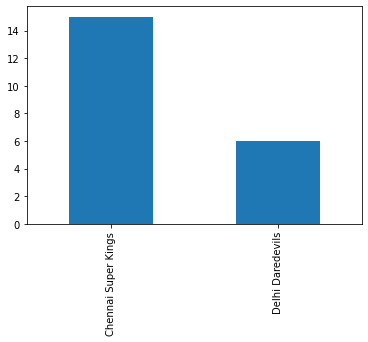

In [169]:
match['winner'].value_counts().plot.bar()
plt.show()

Chennai won 15 times and Delhi won 6 times against each other.

In [170]:
match['toss_winner'].value_counts()

Chennai Super Kings    12
Delhi Daredevils        7
Delhi Capitals          2
Name: toss_winner, dtype: int64

In [171]:
match['toss_decision'].value_counts()

field    11
bat      10
Name: toss_decision, dtype: int64

In [172]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Chennai Super Kings    8
Delhi Daredevils       2
Name: winner, dtype: int64

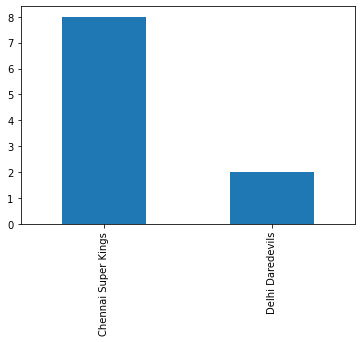

In [173]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Chennai won the toss and won the match 8 times, whereas Delhi won 2 times.

In [174]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning         batting_team      bowling_team  over  ball  \
18372        79       1  Chennai Super Kings  Delhi Daredevils     1     1   
18373        79       1  Chennai Super Kings  Delhi Daredevils     1     2   
18374        79       1  Chennai Super Kings  Delhi Daredevils     1     3   
18375        79       1  Chennai Super Kings  Delhi Daredevils     1     4   
18376        79       1  Chennai Super Kings  Delhi Daredevils     1     5   

          batsman non_striker      bowler  is_super_over  ...  bye_runs  \
18372    PA Patel  SP Fleming  GD McGrath              0  ...         0   
18373  SP Fleming    PA Patel  GD McGrath              0  ...         0   
18374  SP Fleming    PA Patel  GD McGrath              0  ...         0   
18375  SP Fleming    PA Patel  GD McGrath              0  ...         0   
18376  SP Fleming    PA Patel  GD McGrath              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
18372            0            0             0             1           0   
18373            0            0             0             0           0   
18374            0            0             0             0           0   
18375            0            0             0             0           0   
18376            0            0             0             3           0   

       total_runs  player_dismissed dismissal_kind fielder  
18372           1               NaN            NaN     NaN  
18373           0               NaN            NaN     NaN  
18374           0               NaN            NaN     NaN  
18375           0               NaN            NaN     NaN  
18376           3               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Delhi and Chennai.

In [175]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Chennai score in a match:

In [176]:
total_run_Chennai= delivery[delivery['batting_team'] == 'Chennai Super Kings']['total_runs'].sum()
total_run_Chennai

3442

Chennai scored 3442 runs against Delhi till now.

In [177]:
avg_run_Chennai = math.ceil(total_run_Chennai/len(ids))
avg_run_Chennai

164

Chennai scored 164 runs in an average against Delhi.

In [178]:
total_run_Chennai_batting_first = delivery[(delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 1)]['total_runs'].sum()
total_run_Chennai_batting_first

2139

Chennai scored 2139 runs against Delhi till now while batting first.

In [179]:
total_matches_batting_first_Chennai = len(delivery[(delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Chennai

13

Total innings of Chennai batting first against Delhi.

In [180]:
avg_run_Chennai_batting_first = math.ceil(total_run_Chennai_batting_first/total_matches_batting_first_Chennai)
avg_run_Chennai_batting_first

165

Chennai scored 165 in as average against Delhi while batting first.

In [181]:
total_run_Chennai_batting_second = delivery[(delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 2)]['total_runs'].sum()
total_run_Chennai_batting_second

1303

Chennai scored 1303 runs against Delhi till now while batting second.

In [182]:
total_matches_batting_second_Chennai = len(delivery[(delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Chennai

8

Total innings of Chennai batting second against Delhi.

In [183]:
avg_run_Chennai_batting_second = math.ceil(total_run_Chennai_batting_second/total_matches_batting_second_Chennai)
avg_run_Chennai_batting_second

163

Chennai scored 163 in as average against Delhi while batting second.

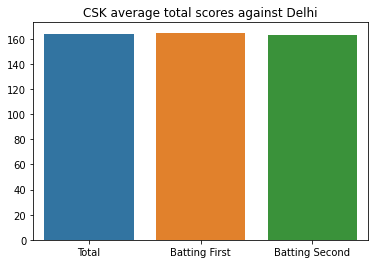

In [184]:
average_match_runs_Chennai = pd.Series([avg_run_Chennai,avg_run_Chennai_batting_first,avg_run_Chennai_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x=average_match_runs_Chennai.index,y=average_match_runs_Chennai)
plt.title('CSK average total scores against Delhi')
plt.show()

Chennai scored 165 while batting first and 163 while batting second in an average against Delhi till now.

## Chennai took Wickets of Delhi in between 91st ball and 120th ball:

In [185]:
total_wickets_Delhi = delivery[(delivery['batting_team'] != 'Chennai Super Kings') & (delivery['over'] >= 16) & (delivery['over'] <= 20)]['player_dismissed'].count()
total_wickets_Delhi

40

Chennai took 40 wickets of Delhi between 91st ball and 120th ball.

In [186]:
avg_wickets_Delhi = math.ceil(total_wickets_Delhi/len(ids))
avg_wickets_Delhi

2

Chennai took 2 wickets of Delhi in an average per match between 91st ball and 120th ball.

In [187]:
total_wickets_batting_first = delivery[(delivery['batting_team'] != 'Chennai Super Kings') & (delivery['over'] >= 16) & (delivery['over'] <= 20) & (delivery['inning'] == 1)]['player_dismissed'].count()
total_wickets_batting_first

14

Chennai took 14 wickets of Delhi between 91st ball and 120th ball while Delhi batting first.

In [188]:
total_matches_batting_first_Delhi = len(delivery[(delivery['batting_team'] != 'Chennai Super Kings') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Delhi

8

Total innings of Delhi batting first against Chennai.

In [189]:
avg_wickets_Delhi_batting_first = math.ceil(total_wickets_batting_first/total_matches_batting_first_Delhi)
avg_wickets_Delhi_batting_first

2

Chennai took 2 wickets of Delhi in an average per match between 91st ball and 120th ball while Delhi batting first.

In [190]:
total_wickets_batting_second = delivery[(delivery['batting_team'] != 'Chennai Super Kings') & (delivery['over'] >= 16) & (delivery['over'] <= 20) & (delivery['inning'] == 2)]['player_dismissed'].count()
total_wickets_batting_second

26

Chennai took 26 wickets of Delhi between 91st ball and 120th ball while Delhi batting second.

In [191]:
total_matches_batting_second_Delhi = len(delivery[(delivery['batting_team'] != 'Chennai Super Kings') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Delhi

13

Total innings of Delhi batting second against Chennai.

In [192]:
avg_wickets_Delhi_batting_second = math.ceil(total_wickets_batting_second/total_matches_batting_second_Delhi)
avg_wickets_Delhi_batting_second

2

Chennai took 2 wickets of Delhi in an average per match between 91st ball and 120th ball while Delhi batting second.

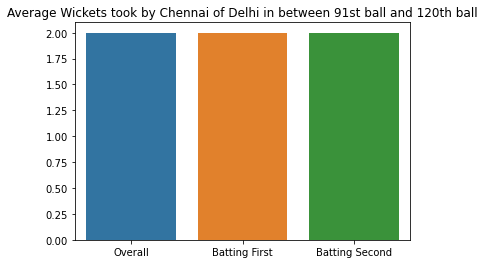

In [193]:
average_wickets_Delhi = pd.Series([avg_wickets_Delhi,avg_wickets_Delhi_batting_first,avg_wickets_Delhi_batting_second],index=['Overall','Batting First','Batting Second'])
sns.barplot(x=average_wickets_Delhi.index,y=average_wickets_Delhi)
plt.title('Average Wickets took by Chennai of Delhi in between 91st ball and 120th ball')
plt.show()

So Chennai took 2 wickets of Delhi in an average between 91st ball and 120th ball while batting first or second.

## CSK take balls to score 100 runs:

In [194]:
ball_list = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Chennai Super Kings')]['total_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Chennai Super Kings')]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Chennai Super Kings')]['noball_runs'])
    s = 0
    index = 0
    l=[]
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if s > 100:
            break
    counter = 0
    for i in range(0,len(l)):
        if wide_runs[i] != 0 or noball_runs[i] != 0:
            counter += 1
    balls = len(l) - counter
    ball_list.append(balls)
ball_taken_Chennai_for_100 = ball_list
print(ball_taken_Chennai_for_100)

[67, 58, 60, 83, 77, 91, 61, 71, 70, 71, 116, 86, 113, 65, 83, 84, 83, 75, 103, 61, 87]


Chennai took these many balls per match to score 100 runs against Delhi.

In [195]:
avg_balls_taken_Chennai = math.ceil(np.mean(ball_taken_Chennai_for_100))
avg_balls_taken_Chennai

80

So Chennai took 80 balls in an average per match to score 100 against Delhi.

In [196]:
ball_list = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 1)]['total_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 1)]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 1)]['noball_runs'])
    s = 0
    index = 0
    l=[]
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if s > 100:
            break
    counter = 0
    for i in range(0,len(l)):
        if wide_runs[i] != 0 or noball_runs[i] != 0:
            counter += 1
    balls = len(l) - counter
    if balls > 0 :
        ball_list.append(balls)
ball_taken_Chennai_for_100_batting_first = ball_list
print(ball_taken_Chennai_for_100_batting_first)

[70, 71, 116, 86, 113, 65, 83, 84, 83, 75, 103, 61, 87]


Chennai took these many balls per match to score 100 runs against Delhi while batting first.

In [197]:
avg_balls_taken_Chennai_batting_first = math.ceil(np.mean(ball_taken_Chennai_for_100_batting_first))
avg_balls_taken_Chennai_batting_first

85

So Chennai took 85 balls in an average per match to score 100 against Delhi while batting first.

In [198]:
ball_list = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 2)]['total_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 2)]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 2)]['noball_runs'])
    s = 0
    index = 0
    l=[]
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if s > 100:
            break
    counter = 0
    for i in range(0,len(l)):
        if wide_runs[i] != 0 or noball_runs[i] != 0:
            counter += 1
    balls = len(l) - counter
    if balls > 0 :
        ball_list.append(balls)
ball_taken_Chennai_for_100_batting_second = ball_list
print(ball_taken_Chennai_for_100_batting_second)

[67, 58, 60, 83, 77, 91, 61, 71]


Chennai took these many balls per match to score 100 runs against Delhi while batting second.

In [199]:
avg_balls_taken_Chennai_batting_second = math.ceil(np.mean(ball_taken_Chennai_for_100_batting_second))
avg_balls_taken_Chennai_batting_second

71

So Chennai took 71 balls in an average per match to score 100 against Delhi while batting second.

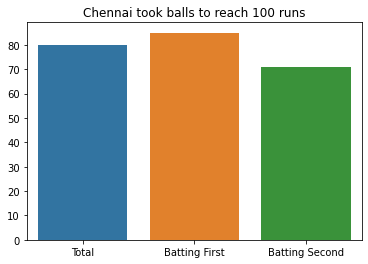

In [200]:
average_balls_taken_Chennai_per_match = pd.Series([avg_balls_taken_Chennai,avg_balls_taken_Chennai_batting_first,avg_balls_taken_Chennai_batting_second],index=['Total','Batting First','Batting Second'])
sns.barplot(x = average_balls_taken_Chennai_per_match.index , y = average_balls_taken_Chennai_per_match)
plt.title('Chennai took balls to reach 100 runs')
plt.show()

So Chennai took less balls while batting second than batting first to reach 100 runs against Delhi.

## No Balls:

In [201]:
total_no_balls = delivery['noball_runs'].sum()
total_no_balls

17

Total 17 no balls were bowled.

In [202]:
noballs_by_Chennai = delivery[delivery['bowling_team'] == 'Chennai Super Kings']['noball_runs'].sum()
noballs_by_Chennai

7

Chennai bowled 7 no balls against Delhi.

In [203]:
noballs_by_Delhi = delivery[delivery['bowling_team'] != 'Chennai Super Kings']['noball_runs'].sum()
noballs_by_Delhi

10

Delhi bowled 10 no balls against Chennai.

In [204]:
avg_noballs = math.ceil(total_no_balls/len(ids))
avg_noballs

1

There is 1 no balls in an average per match.

In [205]:
noballs_bowling_first = delivery[delivery['inning'] == 1]['noball_runs'].sum()
noballs_bowling_first

12

Team bowled 12 no balls while bowling first.

In [206]:
avg_noballs_bowling_first = math.ceil(noballs_bowling_first/len(ids))
avg_noballs_bowling_first

1

There is 1 no ball in an average per match while bowling first.

In [207]:
noballs_bowling_second = delivery[delivery['inning'] == 2]['noball_runs'].sum()
noballs_bowling_second

5

Team bowled 5 no balls while bowling second.

In [208]:
avg_noballs_bowling_second = math.ceil(noballs_bowling_second/len(ids))
avg_noballs_bowling_second

1

There is 1 no ball in an average per match while bowling second.

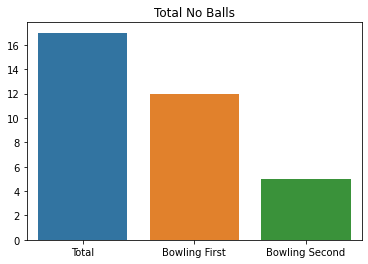

In [209]:
total_noballs_per_match = pd.Series([total_no_balls,noballs_bowling_first,noballs_bowling_second],index=['Total','Bowling First','Bowling Second'])
sns.barplot(x = total_noballs_per_match.index , y = total_noballs_per_match)
plt.title('Total No Balls')
plt.show()

Team bowling first, bowled more no balls than team bowling second.

# Sharjah Ground Condition to some extend similar to Chennai Home Ground so will consider Chennai Home Ground:

In [210]:
match3 =  df2[(df2['team1'] == 'Chennai Super Kings') & ((df2['team2'] == 'Delhi Daredevils') | (df2['team2'] == 'Delhi Capitals')) & (df2['city'] == 'Chennai')]

In [211]:
match3.shape

(7, 18)

In [212]:
match3['winner'].value_counts()

Chennai Super Kings    5
Delhi Daredevils       2
Name: winner, dtype: int64

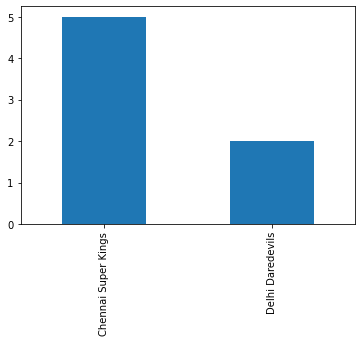

In [213]:
match3['winner'].value_counts().plot.bar()
plt.show()

Chennai won 5 times and Delhi won 2 times against each other at Chennai home ground.

In [214]:
match3['toss_winner'].value_counts()

Chennai Super Kings    4
Delhi Daredevils       2
Delhi Capitals         1
Name: toss_winner, dtype: int64

In [215]:
match3['toss_decision'].value_counts()

bat      4
field    3
Name: toss_decision, dtype: int64

In [216]:
match3[match3['toss_winner'] == match3['winner']]['winner'].value_counts()

Chennai Super Kings    2
Name: winner, dtype: int64

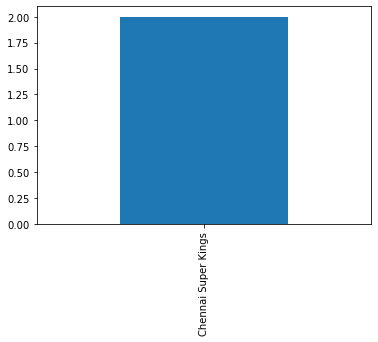

In [217]:
match3[match3['toss_winner'] == match3['winner']]['winner'].value_counts().plot.bar()
plt.show()

Chennai won 2 times after winning toss at Chennai home ground.

In [218]:
ids1 = list(match3['id'])
delivery1 = df1[(df1['match_id'].isin(ids1))]
delivery1.head()

match_id  inning         batting_team      bowling_team  over  ball  \
18372        79       1  Chennai Super Kings  Delhi Daredevils     1     1   
18373        79       1  Chennai Super Kings  Delhi Daredevils     1     2   
18374        79       1  Chennai Super Kings  Delhi Daredevils     1     3   
18375        79       1  Chennai Super Kings  Delhi Daredevils     1     4   
18376        79       1  Chennai Super Kings  Delhi Daredevils     1     5   

          batsman non_striker      bowler  is_super_over  ...  bye_runs  \
18372    PA Patel  SP Fleming  GD McGrath              0  ...         0   
18373  SP Fleming    PA Patel  GD McGrath              0  ...         0   
18374  SP Fleming    PA Patel  GD McGrath              0  ...         0   
18375  SP Fleming    PA Patel  GD McGrath              0  ...         0   
18376  SP Fleming    PA Patel  GD McGrath              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
18372            0            0             0             1           0   
18373            0            0             0             0           0   
18374            0            0             0             0           0   
18375            0            0             0             0           0   
18376            0            0             0             3           0   

       total_runs  player_dismissed dismissal_kind fielder  
18372           1               NaN            NaN     NaN  
18373           0               NaN            NaN     NaN  
18374           0               NaN            NaN     NaN  
18375           0               NaN            NaN     NaN  
18376           3               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Chennai and Delhi at Chennai home ground.

## Chennai score in a match At Chennai home ground:

In [219]:
total_run_Chennai_Chennai_home_ground = delivery1[delivery1['batting_team'] == 'Chennai Super Kings']['total_runs'].sum()
total_run_Chennai_Chennai_home_ground

1183

Chennai scored 1183 runs against Delhi till now at Chennai home ground.

In [220]:
avg_run_Chennai_Chennai_home_ground = math.ceil(total_run_Chennai_Chennai_home_ground/len(ids1))
avg_run_Chennai_Chennai_home_ground

169

Chennai scored 169 runs in an average against Delhi Chennai home ground.

In [221]:
total_run_Chennai_batting_first_Chennai_home_ground = delivery1[(delivery1['batting_team'] == 'Chennai Super Kings') & (delivery1['inning'] == 1)]['total_runs'].sum()
total_run_Chennai_batting_first_Chennai_home_ground

1183

1. Chennai scored 1183 runs against Delhi while batting first at Chennai home ground.
2. Chennai didn't bat in second inning against Delhi Chennai home ground

## Chennai took Wickets of Delhi in between 91st ball and 120th ball at Chennai home ground:

In [222]:
total_wickets_Delhi_Chennai_home_ground = delivery1[(delivery1['batting_team'] != 'Chennai Super Kings') & (delivery1['over'] >= 16) & (delivery1['over'] <= 20)]['player_dismissed'].count()
total_wickets_Delhi_Chennai_home_ground

15

Chennai took 15 wickets of Delhi between 91st ball and 120th ball at Chennai home ground.

In [223]:
avg_wickets_Delhi_Chennai_home_ground = math.ceil(total_wickets_Delhi_Chennai_home_ground/len(ids1))
avg_wickets_Delhi_Chennai_home_ground

3

Chennai took 3 wickets of Delhi in an average per match between 91st ball and 120th ball at Chennai home ground.

In [224]:
total_wickets_batting_second_Chennai_home_ground = delivery1[(delivery1['batting_team'] != 'Chennai Super Kings') & (delivery1['over'] >= 16) & (delivery1['over'] <= 20) & (delivery1['inning'] == 2)]['player_dismissed'].count()
total_wickets_batting_second_Chennai_home_ground

15

Chennai took 15 wickets of Delhi between 91st ball and 120th ball while Delhi batting second at Chennai home ground.

In [225]:
avg_wickets_Delhi_batting_second_Chennai_home_ground = math.ceil(total_wickets_batting_second_Chennai_home_ground/len(ids1))
avg_wickets_Delhi_batting_second_Chennai_home_ground

3

Chennai took 3 wickets of Delhi in an average per match between 91st ball and 120th ball while Delhi batting second at Chennai home ground.

Delhi didn't bat int the first innings against Chennai at Chennai home ground yet.

## CSK take balls to score 100 runs at Chennai home ground:

In [226]:
ball_list = []
for j in ids1:
    runs = list(delivery1[(delivery1['match_id'] == j) & (delivery1['batting_team'] == 'Chennai Super Kings')]['total_runs'])
    wide_runs = list(delivery1[(delivery1['match_id'] == j) & (delivery1['batting_team'] == 'Chennai Super Kings')]['wide_runs'])
    noball_runs = list(delivery1[(delivery1['match_id'] == j) & (delivery1['batting_team'] == 'Chennai Super Kings')]['noball_runs'])
    s = 0
    index = 0
    l=[]
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if s > 100:
            break
    counter = 0
    for i in range(0,len(l)):
        if wide_runs[i] != 0 or noball_runs[i] != 0:
            counter += 1
    balls = len(l) - counter
    ball_list.append(balls)
ball_taken_Chennai_for_100_Chennai_home_ground = ball_list
print(ball_taken_Chennai_for_100_Chennai_home_ground)

[70, 116, 86, 65, 84, 75, 87]


Chennai took these many balls per match to score 100 runs against Delhi at Chennai home ground.

In [227]:
avg_balls_taken_Chennai_Chennai_home_ground = math.ceil(np.mean(ball_taken_Chennai_for_100_Chennai_home_ground))
avg_balls_taken_Chennai_Chennai_home_ground

84

So Chennai took 84 balls in an average per match to score 100 against Delhi at Chennai home ground.

In [228]:
ball_list = []
for j in ids:
    runs = list(delivery1[(delivery1['match_id'] == j) & (delivery1['batting_team'] == 'Chennai Super Kings') & (delivery1['inning'] == 1)]['total_runs'])
    wide_runs = list(delivery1[(delivery1['match_id'] == j) & (delivery1['batting_team'] == 'Chennai Super Kings') & (delivery1['inning'] == 1)]['wide_runs'])
    noball_runs = list(delivery1[(delivery1['match_id'] == j) & (delivery1['batting_team'] == 'Chennai Super Kings') & (delivery1['inning'] == 1)]['noball_runs'])
    s = 0
    index = 0
    l=[]
    for i in range(0,len(runs)):
        s += runs[i]
        l.append(runs[i])
        if s > 100:
            break
    counter = 0
    for i in range(0,len(l)):
        if wide_runs[i] != 0 or noball_runs[i] != 0:
            counter += 1
    balls = len(l) - counter
    if balls > 0 :
        ball_list.append(balls)
ball_taken_Chennai_for_100_batting_first_Chennai_home_ground = ball_list
print(ball_taken_Chennai_for_100_batting_first_Chennai_home_ground)

[70, 116, 86, 65, 84, 75, 87]


Chennai took these many balls per match to score 100 runs against Delhi while batting first at Chennai home ground.

In [229]:
avg_balls_taken_Chennai_batting_first_Chennai_home_ground = math.ceil(np.mean(ball_taken_Chennai_for_100_batting_first_Chennai_home_ground))
avg_balls_taken_Chennai_batting_first_Chennai_home_ground

84

So Chennai took 84 balls in an average per match to score 100 against Delhi while batting first at Chennai home ground.

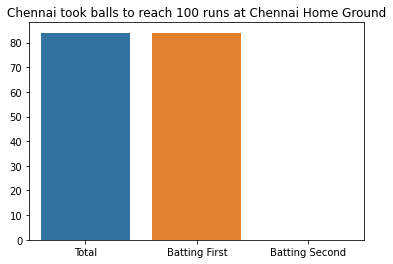

In [230]:
average_balls_taken_Chennai_per_match_Chennai_home_ground = pd.Series([avg_balls_taken_Chennai_Chennai_home_ground,avg_balls_taken_Chennai_batting_first_Chennai_home_ground,0],index=['Total','Batting First','Batting Second'])
sns.barplot(x = average_balls_taken_Chennai_per_match_Chennai_home_ground.index , y = average_balls_taken_Chennai_per_match_Chennai_home_ground)
plt.title('Chennai took balls to reach 100 runs at Chennai Home Ground')
plt.show()

So Chennai took 84 balls in an average per match to score 100 against Delhi while batting first at Chennai home ground.

Chennai didn't bat in the second innings against Delhi at Chennai home ground yet. 

## No Balls at Chennai home ground:

In [231]:
total_no_balls_Chennai_home_ground = delivery1['noball_runs'].sum()
total_no_balls_Chennai_home_ground

9

Total 9 no balls were bowled at Chennai home ground.

In [232]:
noballs_by_Chennai_Chennai_home_ground = delivery1[delivery1['bowling_team'] == 'Chennai Super Kings']['noball_runs'].sum()
noballs_by_Chennai_Chennai_home_ground

2

Chennai bowled 2 no balls against Delhi at Chennai home ground.

In [233]:
noballs_by_Delhi_Chennai_home_ground = delivery1[delivery1['bowling_team'] != 'Chennai Super Kings']['noball_runs'].sum()
noballs_by_Delhi_Chennai_home_ground

7

Delhi bowled 7 no balls against Chennai at Chennai home ground.

In [234]:
avg_noballs_Chennai_home_ground = math.ceil(total_no_balls_Chennai_home_ground/len(ids1))
avg_noballs_Chennai_home_ground

2

There is 2 no balls in an average per match at Chennai home ground.

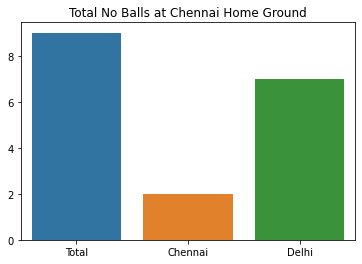

In [235]:
total_noballs_per_match_Chennai_home_ground = pd.Series([total_no_balls_Chennai_home_ground,noballs_by_Chennai_Chennai_home_ground,noballs_by_Delhi_Chennai_home_ground],index=['Total','Chennai','Delhi'])
sns.barplot(x = total_noballs_per_match_Chennai_home_ground.index , y = total_noballs_per_match_Chennai_home_ground)
plt.title('Total No Balls at Chennai Home Ground')
plt.show()

Delhi bowled more no balls than Chennai at Chennai home ground.